# Data Visualization with PCA
Principal Component Analysis (PCA) is a statistical technique for dimensionality reduction and feature extraction. At its core, PCA finds a new set of orthogonal axes (the principal components) onto which your data can be projected such that:

**Maximal Variance**

- The first principal component (PC1) captures the largest possible variance in the data.

- The second principal component (PC2), orthogonal to PC1, captures the next largest variance, and so on.

**Orthogonality**

- All principal components are mutually perpendicular. This ensures that each component adds unique information.

**Linear Transformation**

PCA is a linear mapping: each principal component is a linear combination of the original variables.

### Numpy generate matrix

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n=4
m=4
np.random.seed(0)
matrix = [[0 for i in range(m)] for x in range(n)]
print(matrix)
for i in range(n):
    for x in range(m):
        matrix[i][x] = np.random.randint(1, 101)
print("This matrix is: ", matrix, "\n")

for line in matrix:
    print(line)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
This matrix is:  [[45, 48, 65, 68], [68, 10, 84, 22], [37, 88, 71, 89], [89, 13, 59, 66]] 

[45, 48, 65, 68]
[68, 10, 84, 22]
[37, 88, 71, 89]
[89, 13, 59, 66]


### We also can do:

In [3]:
# Set a seed for reproducibility
np.random.seed(0)

# Parameters
n = 4  # number of samples (rows)
m = 4  # number of features (columns)

# Generate the matrix
matrix = np.random.randint(1, 101, size=(n, m)).astype(float)

# Print the matrix
print("The matrix is:\n", matrix)

The matrix is:
 [[45. 48. 65. 68.]
 [68. 10. 84. 22.]
 [37. 88. 71. 89.]
 [89. 13. 59. 66.]]


### Data Preprocessing - StandardScaler Example

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Initialize the scaler
X_scaled = scaler.fit_transform(matrix)  # Standardize the features

# Step 4: Convert the scaled features back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

# Display the scaled data
print("Standardized Features:")
print(X_scaled_df.head(5))

Standardized Features:
          0         1         2         3
0 -0.724322  0.260994 -0.513139  0.276796
1  0.405129 -0.941160  1.539416 -1.609516
2 -1.117174  1.526419  0.135037  1.137938
3  1.436367 -0.846253 -1.161314  0.194782


### Data Preprocessing - MinMaxScaler Example

In [5]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(matrix))
print("Min-Max Scaled Data:")
print(X_min_max_scaled.head(5))

Min-Max Scaled Data:
          0         1     2         3
0  0.153846  0.487179  0.24  0.686567
1  0.596154  0.000000  1.00  0.000000
2  0.000000  1.000000  0.48  1.000000
3  1.000000  0.038462  0.00  0.656716


### Data Preprocessing - Normalizer Example


In [6]:
from sklearn.preprocessing import Normalizer
# Normalization with L1 Norm
l1_normalizer = Normalizer(norm='l1')
X_l1 = l1_normalizer.fit_transform(matrix)
X_normalized_l1 = pd.DataFrame(X_l1)
print("\nL1 Normalized Data:\n")
print(X_normalized_l1.head(5))


L1 Normalized Data:

          0         1         2         3
0  0.199115  0.212389  0.287611  0.300885
1  0.369565  0.054348  0.456522  0.119565
2  0.129825  0.308772  0.249123  0.312281
3  0.392070  0.057269  0.259912  0.290749


In [7]:
# Normalization with L2 Norm
l2_normalizer = Normalizer(norm='l2')
X_l2 = l2_normalizer.fit_transform(matrix)
X_normalized_l2 = pd.DataFrame(X_l2)
print("\nL2 Normalized Data:\n")
print(X_normalized_l2.head(5))


L2 Normalized Data:

          0         1         2         3
0  0.392002  0.418135  0.566224  0.592358
1  0.614035  0.090299  0.758513  0.198658
2  0.249030  0.592287  0.477868  0.599018
3  0.705217  0.103009  0.467504  0.522970


## 1. Examples from Slide 7.2

In [8]:

matrix = np.array([
    [64, 99, 66, 37],
    [17, 82, 43, 66],
    [16, 74, 79, 13],
    [93, 67, 23, 11]
], dtype=float)
matrix

array([[64., 99., 66., 37.],
       [17., 82., 43., 66.],
       [16., 74., 79., 13.],
       [93., 67., 23., 11.]])

In [9]:
# computing the mean
U = []
mean_donaminator = n
matrix = np.array(matrix)
summ = 0

for i in range(m):
    for x in range(n):
        summ += matrix[x][i]
    U.append(float(summ / mean_donaminator))
    summ = 0

print ("The mean is : ", U, "\n")

The mean is :  [47.5, 80.5, 52.75, 31.75] 



In [10]:
### 
B_matrix = [
    [ 16.5,  18.5,  13.25,   5.25],
    [-30.5,   1.5,  -9.75,  34.25],
    [-31.5,  -6.5,  26.25, -18.75],
    [ 45.5, -13.5, -29.75, -20.75]
]

# convert to NumPy array
B_matrix = np.array(B_matrix)

# print the centered matrix
print("B_matrix is:\n", B_matrix, "\n")

# compute and print its transpose
B_matrix_transpose = B_matrix.T
print("Transpose of B_matrix is:\n", B_matrix_transpose)

B_matrix is:
 [[ 16.5   18.5   13.25   5.25]
 [-30.5    1.5   -9.75  34.25]
 [-31.5   -6.5   26.25 -18.75]
 [ 45.5  -13.5  -29.75 -20.75]] 

Transpose of B_matrix is:
 [[ 16.5  -30.5  -31.5   45.5 ]
 [ 18.5    1.5   -6.5  -13.5 ]
 [ 13.25  -9.75  26.25 -29.75]
 [  5.25  34.25 -18.75 -20.75]]


### Covariance Matrix

In [11]:
# covariance matrix: S = 1/(n-1) * B_matrix * B_matrix_transpose
s_donaminator = n - 1
S_matrix = s_donaminator * np.dot(B_matrix, B_matrix_transpose)

print ("Covariance matrix:\n", S_matrix, "\n")

Covariance matrix:
 [[ 2.4528750e+03 -1.2746250e+03 -1.1718750e+03 -6.3750000e+00]
 [-1.2746250e+03  6.6018750e+03  1.5862500e+02 -5.4858750e+03]
 [-1.1718750e+03  1.5862500e+02  6.2253750e+03 -5.2121250e+03]
 [-6.3750000e+00 -5.4858750e+03 -5.2121250e+03  1.0704375e+04]] 



### Eigenvalues and Eigenvectors by numpy

In [12]:
# Getting just the eigenvalues:
eigenvalues = np.linalg.eigvals(S_matrix)

# Getting eigenvectors:
eigenvectors = np.linalg.eig(S_matrix)

print ("Eigenvalues : \n", eigenvalues, "\n")
print ("Eigenvectors (column 1) : \n", eigenvectors[1], "\n")

Eigenvalues : 
 [ 1.65652860e+04 -3.75722342e-13  3.17024677e+03  6.24896728e+03] 

Eigenvectors (column 1) : 
 [[ 0.07457489 -0.5         0.8626778  -0.01501996]
 [-0.45016114 -0.5        -0.23868842  0.70027337]
 [-0.41273207 -0.5        -0.26653328 -0.71317056]
 [ 0.78831832 -0.5        -0.3574561   0.02791715]] 



## 2. Example from Iris dataset

In [13]:
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

### 2.1. Load and Prepare the Data

In [14]:
# -------------------------
# 1. Load and Prepare the Data
# -------------------------
iris = load_iris()
X = iris.data  # Feature data
y = iris.target  # Species labels
feature_names = iris.feature_names

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2.2 Compute the Covariance Matrix

In [15]:
# PCA is sensitive to scale, so we standardize the data first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------
# Compute the Covariance Matrix
# -------------------------
# The covariance matrix shows how variables vary with respect to each other
cov_matrix = np.cov(X_scaled, rowvar=False)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


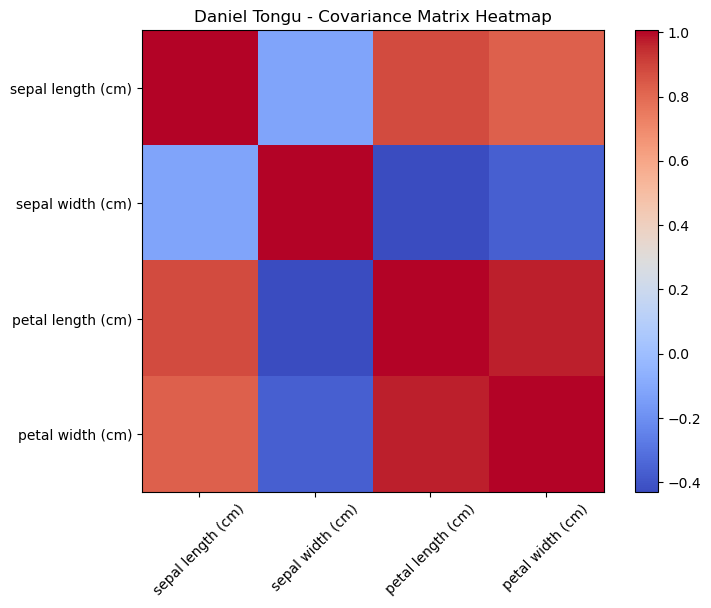

In [16]:
# Visualize the covariance matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix, interpolation='none', cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.yticks(range(len(feature_names)), feature_names)
plt.title("Daniel Tongu - Covariance Matrix Heatmap")
plt.show()

**Covariance Matrix and Its Heatmap Visualization**:

A heatmap of the covariance matrix displays the pairwise relationships between standardized features. Darker colors indicate stronger positive or negative covariances. Analysis:

The covariance matrix reveals how the features move together. For example, if two features have a high positive covariance, they tend to increase or decrease in tandem. In the Iris dataset, some features are correlated, indicating redundancy. This redundancy is one reason why PCA can reduce dimensionality without losing much information. 

Big Takeaway: Understanding the covariance structure helps us see which features share similar information. This redundancy suggests that fewer dimensions (principal components) can effectively capture most of the variability in the data.

### 2.3 Compute Eigenvalues and Eigenvectors

Eigenvalues:
[2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
                   PC1       PC2       PC3       PC4
sepal length  0.521066 -0.377418 -0.719566  0.261286
sepal width  -0.269347 -0.923296  0.244382 -0.123510
petal length  0.580413 -0.024492  0.142126 -0.801449
petal width   0.564857 -0.066942  0.634273  0.523597


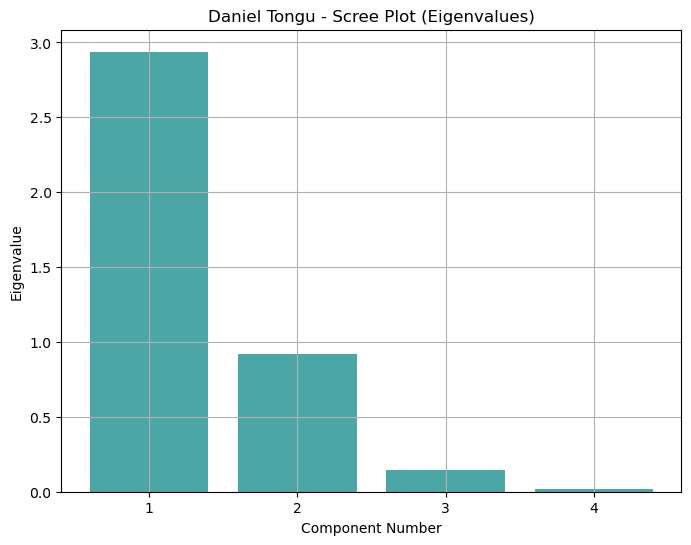

In [17]:
# -------------------------
# Compute Eigenvalues and Eigenvectors
# -------------------------
# These describe the directions (eigenvectors) and magnitude (eigenvalues) of variance
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
Eigenvectors = pd.DataFrame(
    eigenvectors,
    index=['sepal length', 'sepal width', 'petal length', 'petal width'],
    columns=['PC1', 'PC2', 'PC3', 'PC4']
)
print(Eigenvectors)

# Plot eigenvalues in a scree plot
plt.figure(figsize=(8, 6))
components = np.arange(1, len(eigenvalues) + 1)
plt.bar(components, eigenvalues, color='teal', alpha=0.7)
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Daniel Tongu - Scree Plot (Eigenvalues)')
plt.xticks(components)
plt.grid(True)
plt.show()

**Eigenvalues and Scree Plot**

Visualization:

A scree plot displays the eigenvalues associated with each principal component.
Both individual and cumulative explained variance ratios are plotted.
Analysis:

- The eigenvalues indicate how much variance each principal component captures.
- The first principal component (PC1) has the highest eigenvalue, meaning it explains the most variance.
- The cumulative plot helps determine the number of components needed to retain a desired level of total variance (often 80–95%).

Big Takeaway:
Most of the data's variance is captured by the first few components. This means that even though the original dataset may be high-dimensional, its essential structure can be represented in a much lower-dimensional space.

### 2.4 2D PCA Visualization

2D PCA Explained Variance Ratio:
[0.72962445 0.22850762]


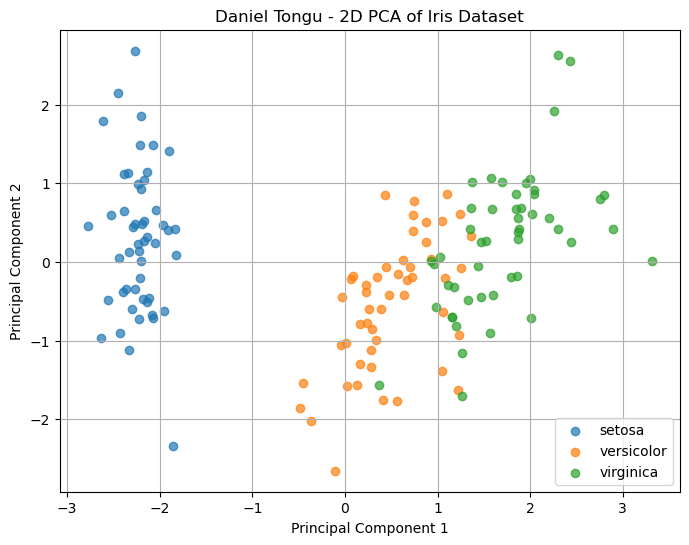

In [18]:
# 5A. 2D PCA
pca2d = PCA(n_components=2)
X_pca_2d = pca2d.fit_transform(X_scaled)
pca2d_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
pca2d_df['species'] = df['species']

# Print explained variance ratio for 2D PCA
print("2D PCA Explained Variance Ratio:")
print(pca2d.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
for species in iris.target_names:
    subset = pca2d_df[pca2d_df['species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], label=species, alpha=0.7)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Daniel Tongu - 2D PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

**2D PCA Scatter Plot**

Visualization:

- A 2D scatter plot of the data projected onto PC1 and PC2.
- Different colors indicate different Iris species.

Analysis:

- The plot shows clear clustering of the Iris species, indicating that the first two principal components capture the essential differences between the species.
- Overlapping regions might suggest that some species have similar characteristics or that more subtle differences exist.

Big Takeaway:
The 2D projection reveals that the majority of the discriminative information in the Iris dataset is contained within the first two principal components, making it easier to distinguish between species visually.


### 2.5 Biplot (2D)

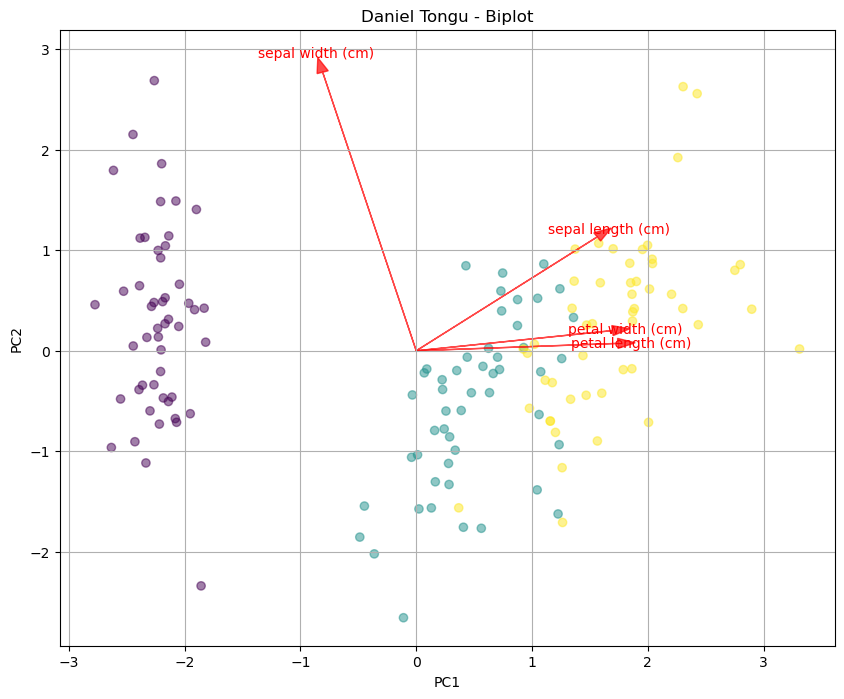

In [19]:
# -------------------------
# Visualization : Biplot (2D)
# -------------------------
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    plt.figure(figsize=(10, 8))
    # Scatter plot of the PCA scores
    plt.scatter(xs, ys, c=y, cmap='viridis', alpha=0.5)
    
    for i in range(n):
        # Plot arrows for feature loadings, scaled for visibility
        plt.arrow(0, 0, coeff[i, 0] * 3, coeff[i, 1] * 3, color='r', alpha=0.7, head_width=0.1)
        if labels is None:
            plt.text(coeff[i, 0] * 3.2, coeff[i, 1] * 3.2, "Var"+str(i+1), color='r', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 3.2, coeff[i, 1] * 3.2, labels[i], color='r', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Daniel Tongu - Biplot")
    plt.grid(True)
    plt.show()

# Calculate the loadings for the 2D PCA (these are the eigenvectors for PC1 and PC2)
loadings = pca2d.components_.T

# Create a biplot using the 2D PCA scores and loadings
biplot(X_pca_2d, loadings, labels=feature_names)

# Explanation:
# The biplot overlays the PCA scores with arrows representing the loadings of the original features.
# This visualization helps you understand which features influence each principal component.

**Biplot (2D)**

Visualization:

- A biplot overlays the 2D PCA scatter plot with arrows representing the loadings (i.e., contributions) of the original features.
- The direction and length of the arrows indicate how strongly each original feature influences the principal components.

Analysis:

- The biplot shows which features are driving the separation between species.
- For instance, longer arrows indicate a strong influence on the principal component, and the direction suggests how the feature contributes to the variance.
- This helps in interpreting the principal components in terms of the original features.

Big Takeaway:
- The biplot bridges the gap between the reduced-dimensional representation and the original variables. It reveals which features are most important in differentiating the species, providing a deeper understanding of the underlying data structure.

Overall Big Takeaway

- The combined visualizations demonstrate that:

Dimensionality Reduction Works: Most of the variance in the Iris dataset is captured by the first few principal components, meaning we can reduce complexity without significant information loss.
Natural Clusters Exist: The 2D and 3D scatter plots clearly show clusters corresponding to the Iris species, confirming that the dataset has inherent structure.
Feature Contributions are Key: The biplot shows which original features contribute most to this structure, offering insights into the characteristics that differentiate the species.
In summary, PCA not only simplifies the data but also reveals the critical structure and relationships within it, making it a powerful tool for both analysis and visualization.

### Practice: 3D PCA Visualization

In your code, please clearly label the data and include annotations for the x and y axes. 

Additionally, add your name to the title. 

Finally, refer to the observations from the 2D PCA visualization and share your thoughts on the 3D PCA results.

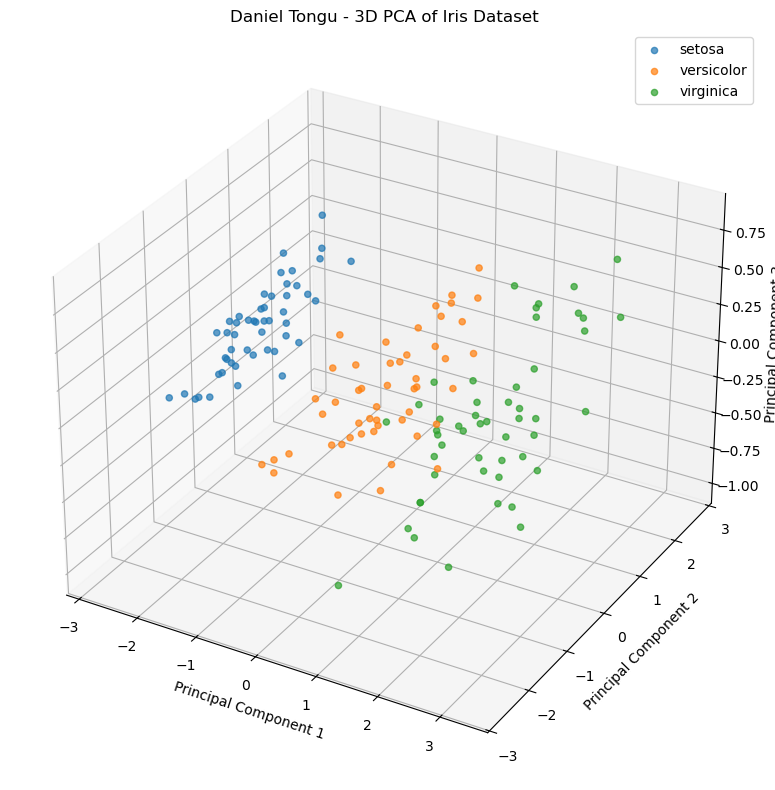

In [28]:
from mpl_toolkits.mplot3d import Axes3D

# -------------------------
# Perform PCA with 3 Components
# -------------------------

# Fit PCA model to the scaled dataset and transform it into 3D
pca3d = PCA(n_components=3)
X_pca_3d = pca3d.fit_transform(X_scaled)

# Create a DataFrame for the 3D PCA-transformed data
pca3d_df = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca3d_df['species'] = df['species']

# -------------------------
# 3D Visualization using PCA
# -------------------------

# Create a 3D scatter plot for the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate through each species and plot in different colors
for species in iris.target_names:
    subset = pca3d_df[pca3d_df['species'] == species]
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'], 
        label=species, 
        alpha=0.7
    )

# Set plot labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Daniel Tongu - 3D PCA of Iris Dataset')
ax.legend()
plt.tight_layout()
plt.show()

### 3D PCA Scatter Plot observation

Your answer:



- The 3D view improves separation, especially between Versicolor and Virginica.
- This dimensionality adds depth where the 2D plot had overlap.
- Again, Setosa is linearly separable even in 3D, showing it’s distinctly different.
